In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [3]:
font_size = 24
dpi = 400

# Simple diagram of crater morphology

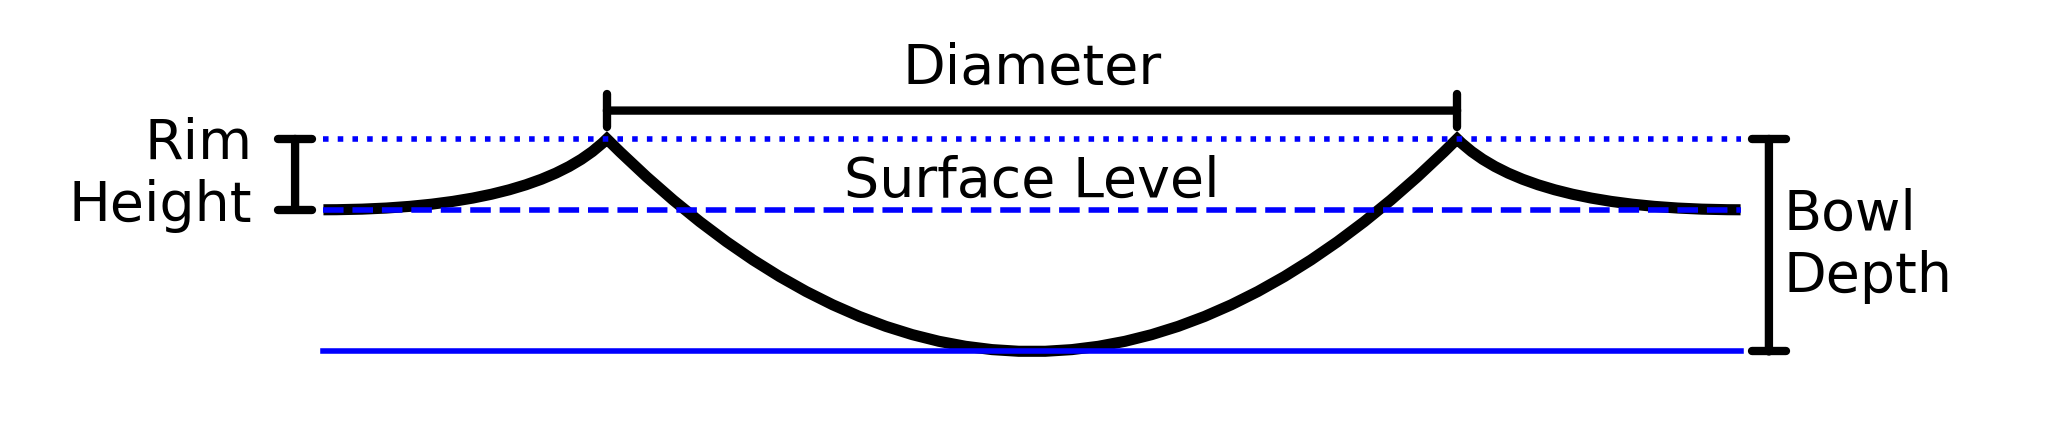

In [44]:
# Define control points
vertices = [
    # Left side, up to rim. Quadratic.
    (0, 2),       # Start
    (0.75, 2),    # Control
    (1, 2.25),    # Endpoint (Left Rim)

    # Bowl, quadratic
    (2.5, 0.75),  # Bottom of the bowl
    (4, 2.25),    # Right Rim

    # Right side
    (4.25, 2),    # Control
    (5, 2),       # End
]

# Define path codes
codes = [
    # Left side, up to rim. Quadratic.
    Path.MOVETO,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3,
]

# Create the path
path = Path(vertices, codes)
patch = PathPatch(path, facecolor="none", edgecolor="black", lw=2)

# Set up the plot
fig, ax = plt.subplots(dpi=dpi)
ax.set_aspect("equal")
ax.add_patch(patch)


# Rim height, horizontal line
line = np.array([
    [0, vertices[2][1]],
    [5, vertices[2][1]]
])
ax.plot(line[:,0], line[:,1], "b:", lw=1)

# Surface height, horizontal line
line = np.array([
    [0, vertices[0][1]],
    [5, vertices[0][1]]
])
ax.plot(line[:,0], line[:,1], "b--", lw=1)

# Bowl depth, horizontal line
line = np.array([
    [0, 1.5],
    [5, 1.5]
])
ax.plot(line[:,0], line[:,1], "b-", lw=1)


# Annotate the crater diameter
diameter_points = np.array([
    [1, 2.25],
    [4, 2.25]
])
ax.annotate(
    "",
    xy=(1, 2.35),
    xytext=(4, 2.35),
    arrowprops=dict(
        arrowstyle="|-|,widthA=0.3,widthB=0.3",
        color="black",
        shrinkA=0,
        shrinkB=0,
        lw=1.5,
    )
)
ax.text(
    2.5,
    2.5,
    "Diameter",
    fontsize=10, 
    va="center",
    ha="center"
)

# Annotate the surface level
ax.text(
    2.5,
    2.1,
    "Surface Level",
    fontsize=10, 
    va="center",
    ha="center"
)

# Annotate the bowl depth
ax.annotate(
    "",
    xy=(5.1, 1.5),
    xytext=(5.1, vertices[2][1]),
    arrowprops=dict(
        arrowstyle="|-|,widthA=0.3,widthB=0.3",
        color="black",
        shrinkA=0,
        shrinkB=0,
        lw=1.5,
    )
)
ax.text(
    5.15,
    (1.5 + vertices[2][1]) / 2,
    "Bowl\nDepth",
    fontsize=10, 
    va="center",
)

# Annotate the rim height
ax.annotate(
    "",
    xy=(-0.1, 2),
    xytext=(-0.1, vertices[2][1]),
    arrowprops=dict(
        arrowstyle="|-|,widthA=0.3,widthB=0.3",
        color="black",
        shrinkA=0,
        shrinkB=0,
        lw=1.5,
    )
)
ax.text(
    -.25,
    (2 + vertices[2][1]) / 2,
    "Rim\nHeight",
    fontsize=10, 
    va="center",
    ha="right"
)

# Set axis limits
ax.set_xlim(-1, 6)
ax.set_ylim(1.35, 2.6)

ax.axis("off")
plt.savefig(f"figures/crater_morphology_diagram.png", bbox_inches="tight")
plt.show()